### Part 01 - Pytorch

## PyTorch Workflow

#### Standard Imports ####

In [236]:
import torch
from torch import nn # nn contains all of pytorch's buildign blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__


'1.13.1'

### Building first model ###
- Using Torch NN

## 1. Data (preparing and loading) ##
Data can be many things!
- Excel sheet
- Images
- Videos
- Audio

Machine Learning is a game of two parts: 
1. Get data into some numerical representation
2. Build a model to lean patterns in that numerical representation

Inputs &rarr; Numerical Encoing &rarr; Learns representation(network) &rarr; Representation Outputs &rarr; Interpret Outputs

To show this, start with linear regression.

### Use Linear regression to make a straight line with known paramters ###

In [237]:
# Create *known* parameters :    Y = A + BX
# Let weight be B  and bias be A
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #gets rid of extra container-like bracket
y = weight * X + bias    #essentially  y = Bx+ A

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [238]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general) ###

Typically:
* Traning set is about 60-80% (always used in ML)
* Validation set is about 10-20%  (not necessary for all forms of ML)
* Testing set is about 10-20%  (always used in ML)


Create training and test data set with our data:

In [239]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
#Validate training - to - testing ratio
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

### Useful Plot Function: ###

In [240]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
                     
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))

    #Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

    #Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    #Check if the model yields a prediction
    if predictions is not None:
        #Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    #Show the Legend
    plt.legend(prop={"size":14})


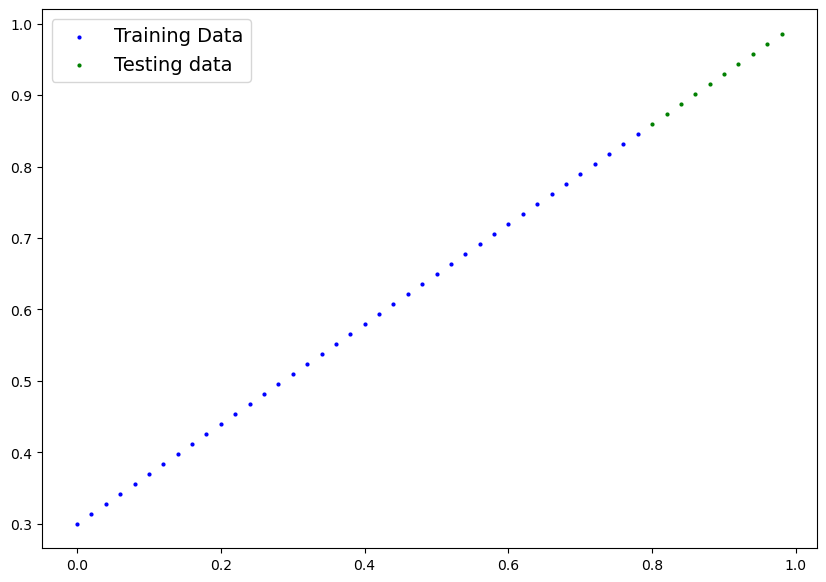

In [241]:
plot_predictions()

## 2. Build model

First Linear regression PyTorch model!

what the model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent(or get closer to) the ideal values (the weight and bias values we used to create training and testing data!)

How does it do so?
Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [242]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                 requires_grad=True,
                                                 dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, 
                                                 requires_grad=True,
                                                 dtype=torch.float))  
    #Forward emthod to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias    #this is effectively the Linear regression formula                                                                           


The forward method has to be overridden when using nn.Module

### PyTorch model building essentials ###
* `torch.nn` - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* `torch.nn.parameter` - what parameters should our model try and elarn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward()`
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclasses require you t overwrite forward(), this method defines what happens in the forward computation



### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside ...
So we can check our model paramters or what's inside our model using `.paramters()`

In [243]:
a = torch.randn(1)
b = torch.manual_seed(42)
a, b

(tensor([0.3367]), <torch._C.Generator at 0x2aa14f28290>)

In [244]:
#Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is  asubclass of nn.Module)
model_0 = LinearRegressionModel()
#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [245]:
# List named paramters
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [246]:
#"ideal values"
weight, bias  # we will try to get the values to "learn" these values throuh gradient descent and backpropagation

(0.7, 0.3)

### Making rpedictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.


In [247]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [248]:
# Make predictions with model - MANAGE CONTEXT TO INFERENCE MODE (offloads other stuff that isn't really needed)
# Inference mode gets rid of gradient tracking and stuff
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds, "COMPARES TO" ,y_test


(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 'COMPARES TO',
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

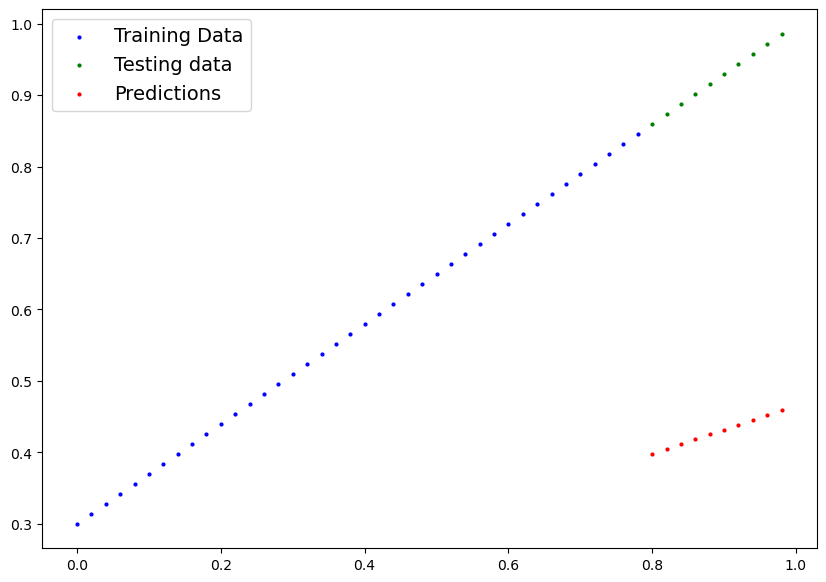

In [249]:
plot_predictions(predictions=y_preds)

### LAST TIME STAMP: 5:33:39

## 3. Train Model

The whole idea of training is for a model to move from some *unkown* paramters(these may be random) to some known paramters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss functions.

Things we need to train:

* **Loss functions:** A function to measure how wrong your model's prections are to the ideal outputs, so lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g weight and bias) to improve the loss function.
    * inside of our optimizer:
        * `params` - the model parameters that you want to optimize
        * `lr` - learning rate that is used to adjust the loss function for backpropagation


And specifically for PyTorch, we need:
* A training loop
* A testing loop





In [250]:
list(model_0.parameters())  #weight and bias

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [251]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

`nn.L1Loss` is same as MAE

In [252]:
# Setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001) # lr = learning rate = possibly the most important hyperparameter you can set   

Q: Which loss function to use?
A: 
* Use SGD or GD with L1Loss will sufice for regressions
* But for classification problems such as identifying if an image is a dog or a cat, use `nn.BCELoss()` (Binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data

1. Forward pass (this involves data moving through our model's `forward()` method) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backwards through network to calculate the gradients of each of the parameters of our model with respect to the loss. (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model;s parameters to try and improve the loss. (**gradient descent**)


In [253]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [254]:
torch.manual_seed(42)
# An epoch is one loop through the data ... (hyperparameter becasue we set it ourself!)
epochs = 100
#Track values
epoch_count = []
loss_values = []
test_loss_values = []

### Training 
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() #train mode in PyTorch sets all parametes that require gradients to require gradients

    model_0.eval() # turns off gradient tracking

    #1. Forward pass
    y_pred = model_0(X_train)

    #2. Calculate the loss
    # loss functions are usually (input, target)
    loss = loss_fn(y_pred,  y_train)
    #print("Loss: " + str(loss))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to ero them in step 3 for the next iteration of the loop.

    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testin (dropout layers, batch norm layersm, ... )
    with torch.inference_mode():  # turns off gradient tracking and a couple more things behind the scenes
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    # Print Out what is happening
    if(epoch % 10 == 0):
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch {epoch} | Loss: {loss} | Test loss: {test_loss}")
        # Print out the model state_dict()
        print(model_0.state_dict())

Epoch 0 | Loss: 0.31288138031959534 | Test loss: 0.4931890368461609
OrderedDict([('weights', tensor([0.3371])), ('bias', tensor([0.1298]))])
Epoch 10 | Loss: 0.3013603389263153 | Test loss: 0.4797181189060211
OrderedDict([('weights', tensor([0.3410])), ('bias', tensor([0.1398]))])
Epoch 20 | Loss: 0.28983938694000244 | Test loss: 0.4662471413612366
OrderedDict([('weights', tensor([0.3449])), ('bias', tensor([0.1498]))])
Epoch 30 | Loss: 0.2783183455467224 | Test loss: 0.4527761936187744
OrderedDict([('weights', tensor([0.3488])), ('bias', tensor([0.1598]))])
Epoch 40 | Loss: 0.26679736375808716 | Test loss: 0.43930521607398987
OrderedDict([('weights', tensor([0.3527])), ('bias', tensor([0.1698]))])
Epoch 50 | Loss: 0.2552763819694519 | Test loss: 0.4258342385292053
OrderedDict([('weights', tensor([0.3566])), ('bias', tensor([0.1798]))])
Epoch 60 | Loss: 0.24375538527965546 | Test loss: 0.41236335039138794
OrderedDict([('weights', tensor([0.3605])), ('bias', tensor([0.1898]))])
Epoch 70

In [255]:
weight, bias

(0.7, 0.3)

In [256]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

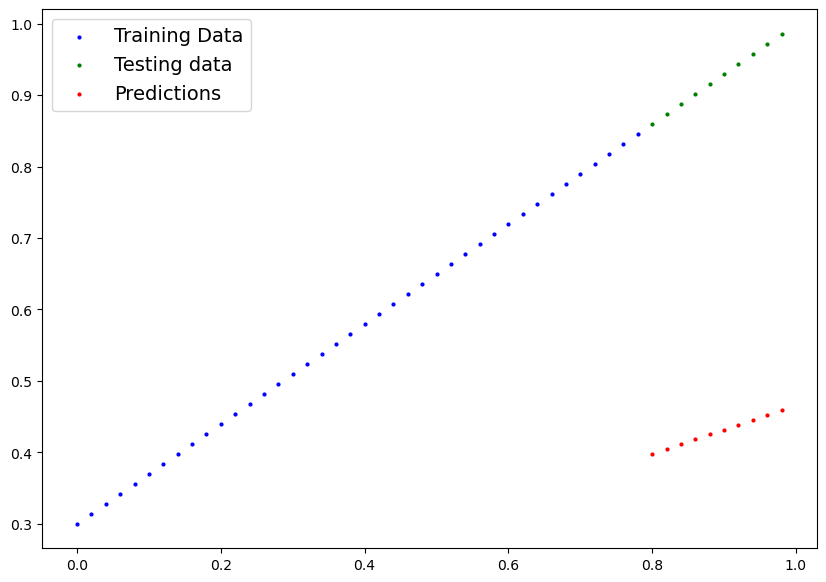

In [257]:
# Old predictions (epoch 0)
plot_predictions(predictions=y_preds)

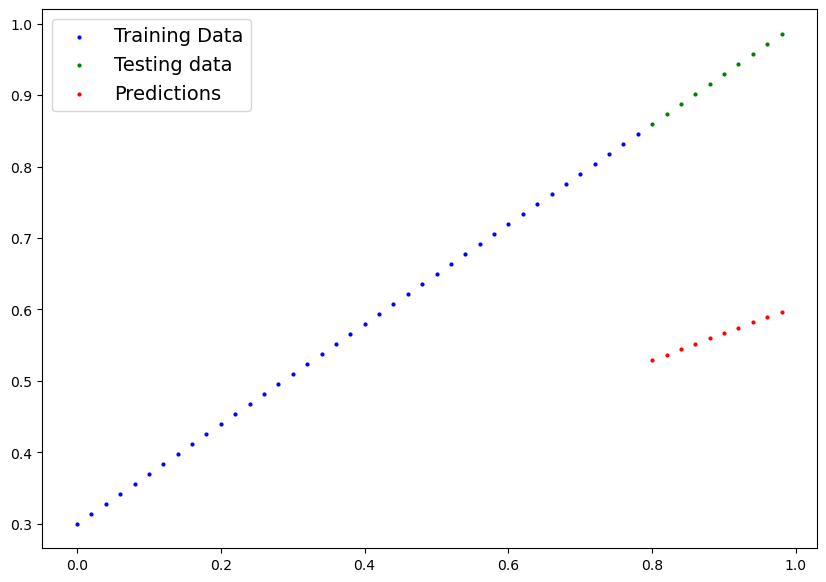

In [258]:
#Current Prediction
plot_predictions(predictions=y_preds_new)

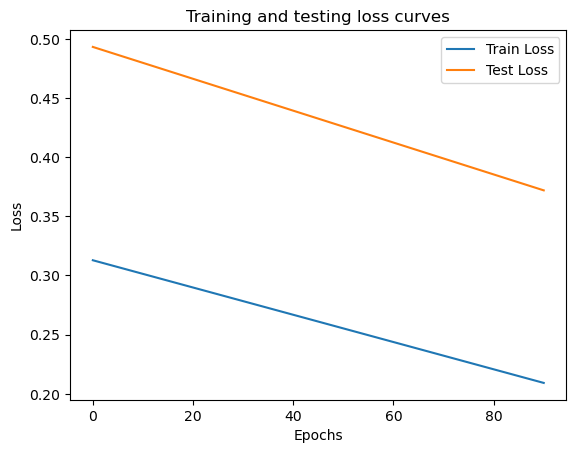

In [259]:
import numpy as np
#Plot the Loss Curves

plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch
There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle module
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [260]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])

In [261]:
#Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)




Saving model to: models\01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we will create a new instance of our model class and load the saved `state_dict()` into that.

In [262]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])

In [263]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel() # new instance!

#Load the saved state_dict of model_0 (this wil updated the new instance with the updated parameters.)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [264]:
loaded_model_0.state_dict() # should have exact same values as model_0

OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])

In [265]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.5294],
        [0.5369],
        [0.5444],
        [0.5519],
        [0.5594],
        [0.5669],
        [0.5744],
        [0.5820],
        [0.5895],
        [0.5970]])

In [266]:
#Make some models preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [267]:
#Compare load model preds with original wtih original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in once place.


In [268]:
#Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'1.13.1'

Create device-agnostic code.
This means if we've got access toa GPYm our code will use it (for potentially faster computing)


In [269]:
#Setup device agnostic code (i.e use GPU if possible)
device = "cuda" if torch.cuda.is_available() else "cpu"
tensor = torch.tensor([1,2,3])
"Device is: " + str(device)

'Device is: cpu'



### 6.1 Data

LAST TIME STAMP WAS 7:44:31  "PUTTING EVERYTHING TOGETHER PART 1)

In [270]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.27
bias = 0.2

#Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) #Without unsqueeze, errors will pop up due to outer bracket 
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2054],
         [0.2108],
         [0.2162],
         [0.2216],
         [0.2270],
         [0.2324],
         [0.2378],
         [0.2432],
         [0.2486]]))

In [271]:
#Split data    Data is typicaly split into 80 and 20 (train and test sets)
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)



(40, 40, 10, 10)

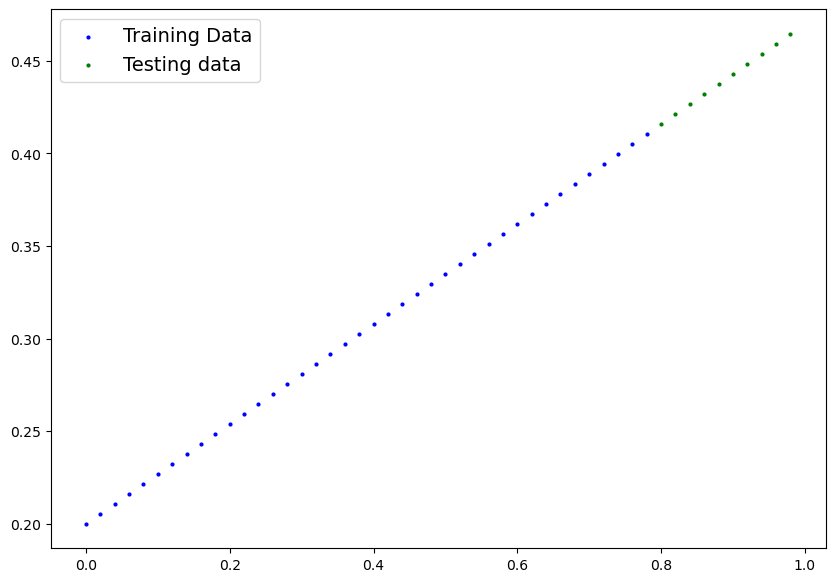

In [272]:
#Plot the data
#NoteL: if you don;t have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model

In [273]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating th model parameters / also called : linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:  #takes a tensor and returns a tensor
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [274]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.2000],
         [0.2054],
         [0.2108],
         [0.2162],
         [0.2216]]))

In [275]:
#Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [276]:
#Set the model to use the target device
model_1.to(device)
#Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [277]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop


In [292]:
# Setup the loss function
loss_fn = nn.L1Loss() # same as MAE

#Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.001)  # Stochastic Gradient Descent


In [303]:
# Write a training loop
torch.manual_seed(42)

epochs = 1000

#Put data on the target device (device agnostic code for data) ALL TENSORS ON SAME DEVICE
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
    model_1.train()

    #1. Forward Pass
    y_pred = model_1(X_train)

    #2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Perform backpropagation
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)
    
    #Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss } | Test loss: {test_loss}")




Epoch: 0 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 10 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 20 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 30 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 40 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 50 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 60 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 70 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 80 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 90 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 100 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 110 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 120 | Loss: 0.0007662944262847304 | Test loss: 0.00025772451772354543
Epoch: 130

In [304]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2706]])),
             ('linear_layer.bias', tensor([0.2005]))])

In [305]:
# ideal values:
weight, bias

(0.27, 0.2)

## 6.4 Making and evaluating predictions

In [306]:
# Turn model into evaluation mode
model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds


tensor([[0.4170],
        [0.4224],
        [0.4279],
        [0.4333],
        [0.4387],
        [0.4441],
        [0.4495],
        [0.4549],
        [0.4603],
        [0.4657]])

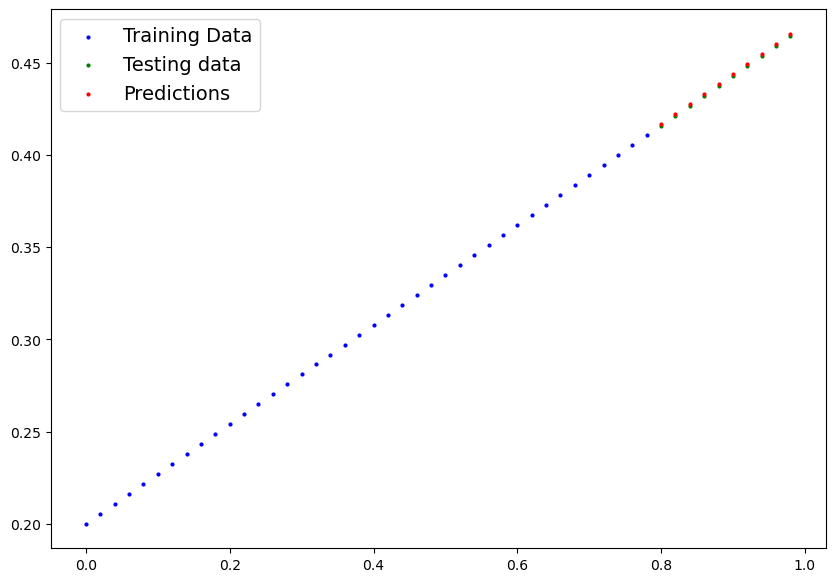

In [307]:
# Check out our model predictions visually
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds)


## 6.5 Saving and Loading a Model

In [312]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Creat movel save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
            f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_workflow_model_1.pth


In [313]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2706]])),
             ('linear_layer.bias', tensor([0.2005]))])